# PCA

## Choosing the Right Number of Dimensions
* Instead of arbitrarily choosing the number of dimensions to reduce down to,it is simpler to choose the number of dimensions that add up to a sufficientlylarge portion of the variance—say, 95% (An exception to this rule, of course,is if you are reducing dimensionality for data visualization, in which case youwill want to reduce the dimensionality down to 2 or 3).

* The following code loads and splits the MNIST dataset (introduced inChapter 3) and performs PCA without reducing dimensionality, thencomputes the minimum number of dimensions required to preserve 95% ofthe training set’s variance:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit_transform(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 # d equals 154

d

154

* Instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve:

In [8]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

* The actual number of components is determined during training, and it is stored in the `n_components_` attribute:

In [9]:
pca.n_components_

154

* Yet another option is to plot the explained variance as a function of the number of dimensions (simply plot cumsum; see Figure 8-8). There will usually be an elbow in the curve, where the explained variance stops growing fast.

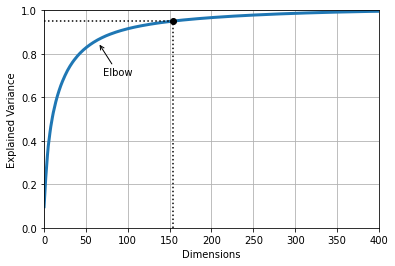

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow",
             xy=(65, 0.85),
             xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->")
            )
plt.grid(True)

* The following code example creates a two-step pipeline, first reducing dimensionality using PCA, then classifying using a random forest. Next, it uses RandomizedSearchCV to find a good combination of hyperparameters for both PCA and the random forest classifier. This example does a quick search, tuning only 2 hyperparameters, training on just 1,000 instances, and running for just 10 iterations:

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    PCA(random_state=42),
    RandomForestClassifier(random_state=42)
)

param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500)
}

rnd_search = RandomizedSearchCV(
    clf,
    param_distrib,
    n_iter=10,
    cv=3
)

rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])})

* Let’s look at the best hyperparameters found:

In [12]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 227, 'pca__n_components': 28}